<a href="https://colab.research.google.com/github/ALRIER/OLSWaterloo/blob/main/group_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import datetime
from datetime import datetime


# import statsmodels.api as sm
import statsmodels.formula.api as sm  # COURS MODEL
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
plt.style.use('bmh')

# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot


# Loading the data

In [ ]:
weather = pd.read_csv('weatherHistory.csv')
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# drop "Loud Cover" because there are onoly zeroes
# drop "Apparent Temperature (C)" because Collinearity

In [ ]:

# drop "Loud Cover" because there are onoly zeroes
# drop "Apparent Temperature (C)" because Collinearity

weather = weather.drop(['Loud Cover', 'Apparent Temperature (C)'], axis=1)
weather

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


# date-time format

In [ ]:
# date-time format

date_list = []

for i in range(weather.shape[0]):
    a = weather['Formatted Date'][i]
    l = (int(a[:4]), int(a[5:7]), int(a[8:10]), int(a[11:13]), int(a[14:16]), int(a[17:19]))
    b = datetime(l[0], l[1], l[2], l[3], l[4], l[5])
    date_list.append(b)


In [ ]:
weather.insert(0, 'Date_time', date_list)
weather.drop('Formatted Date', inplace=True, axis=1)

In [ ]:
weather.tail()

,Date_time,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00,Partly Cloudy,rain,20.438889,0.61,5.8765,39.0,15.5204,1016.16,Partly cloudy starting in the morning.


# checking the range of data

In [ ]:
print(np.array(weather['Date_time'])[0])

print(np.array(weather['Date_time'])[-1])

2006-04-01T00:00:00.000000000
2016-09-09T23:00:00.000000000


# exploring 'Precip Type' and 'Summary', categorical variables

In [ ]:
weather['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [ ]:
weather['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

# 'Precip Type', nulls = 517

In [ ]:
weather['Precip Type'].isnull().sum()

517

In [ ]:
# weather['Daily Summary'].unique()

In [ ]:
weather.shape

(96453, 10)

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date_time               96453 non-null  datetime64[ns]
 1   Summary                 96453 non-null  object        
 2   Precip Type             95936 non-null  object        
 3   Temperature (C)         96453 non-null  float64       
 4   Humidity                96453 non-null  float64       
 5   Wind Speed (km/h)       96453 non-null  float64       
 6   Wind Bearing (degrees)  96453 non-null  float64       
 7   Visibility (km)         96453 non-null  float64       
 8   Pressure (millibars)    96453 non-null  float64       
 9   Daily Summary           96453 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 7.4+ MB


# drop NaN

In [ ]:
weather = weather.dropna().copy()
weather.head()

,Date_time,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


# descriptive stats

In [ ]:
weather.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,11.940976,0.734841,10.804936,187.518773,10.362402,1003.150038
std,9.570671,0.195724,6.920727,107.385351,4.173780,117.276976
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.604167,0.600000,5.796000,116.000000,8.372000,1011.890000
50%,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000
75%,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000
max,39.905556,1.000000,63.852600,359.000000,16.100000,1046.380000


# ploting df
# outliers in "Pressure (millibars)"

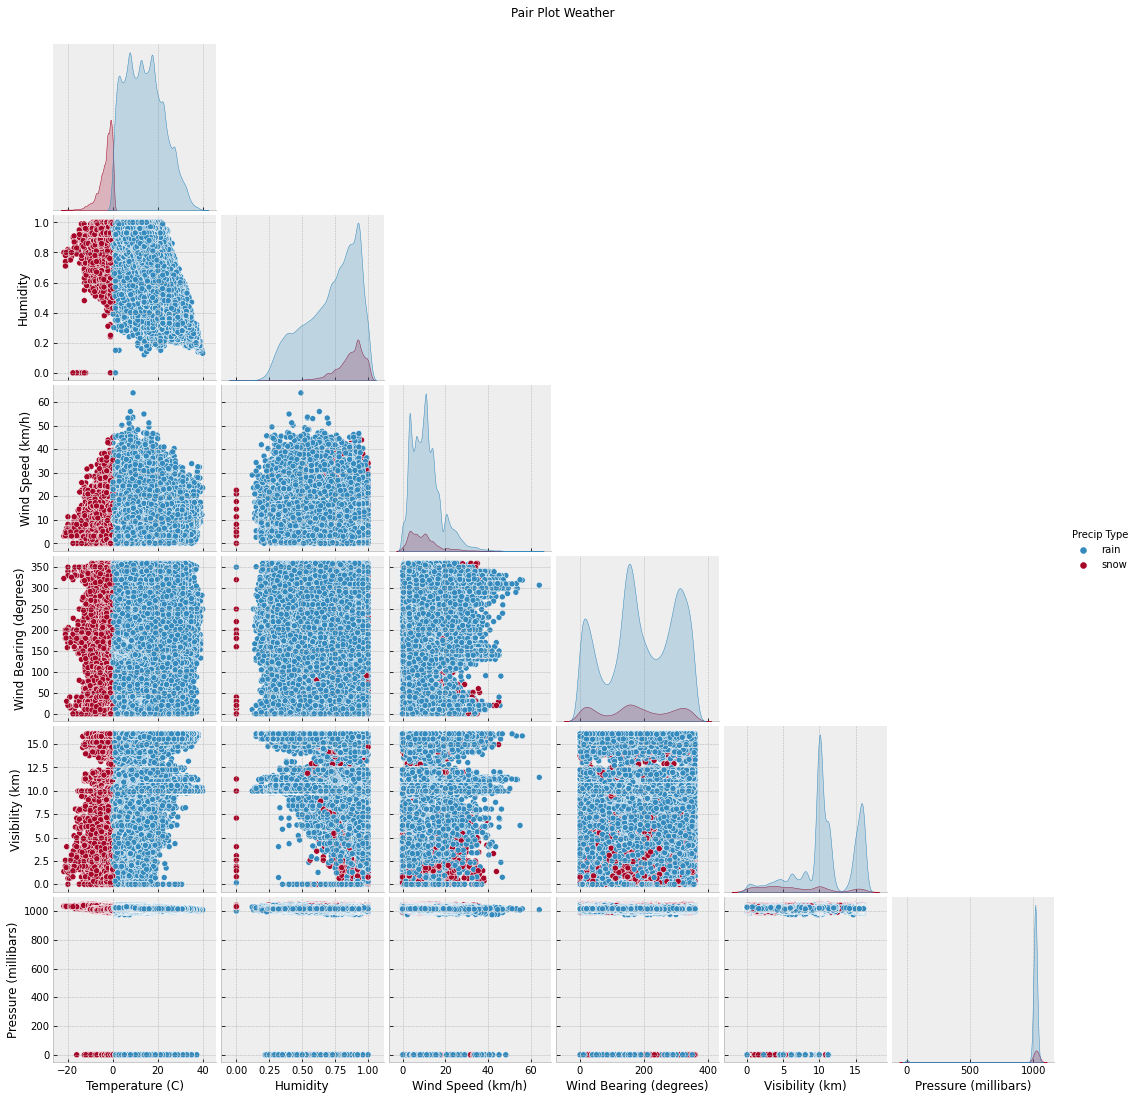

In [ ]:
# weather_pair_plot = sns.pairplot(weather, hue = 'Precip Type' , corner=True)
# weather_pair_plot.fig.suptitle('Pair Plot Weather', y=1.02);

# correlation matrix

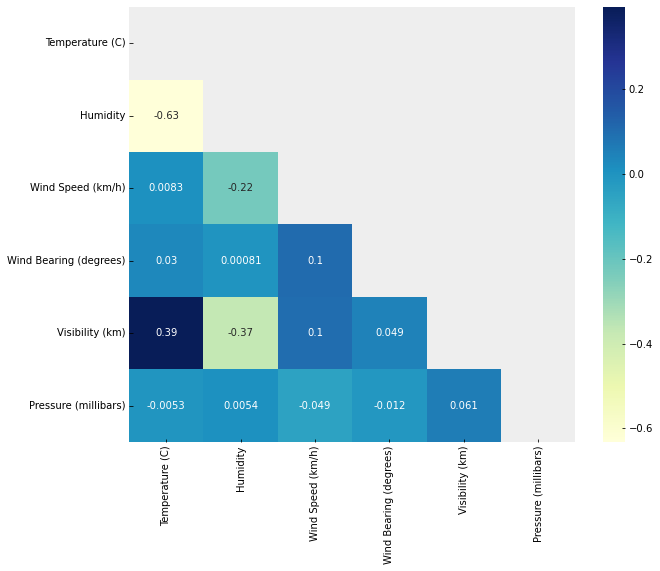

In [ ]:
fig, ax = plt.subplots(figsize=(10,8)) 

# creating mask
mask = np.triu(np.ones_like(weather.corr()), 0)

sns.heatmap(weather.corr(), annot=True, ax=ax, cmap="YlGnBu", mask=mask);

# exploring "Pressure (millibars)"

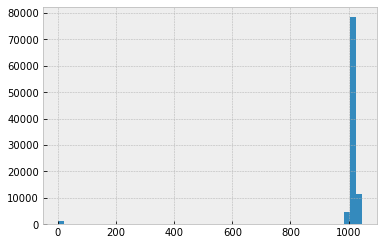

In [ ]:
# Pressure (millibars) with zeroes

plt.hist(weather["Pressure (millibars)"], bins=50);

# dropping zeroes

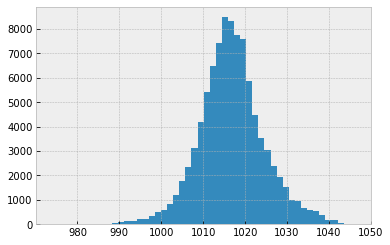

In [ ]:
# Pressure (millibars) removing zeroes

plt.hist(weather["Pressure (millibars)"].loc[lambda x : x != 0], bins=50);

In [ ]:
# number of zeroes in Pressure (millibars)

# investigate, why the zeroes?

weather["Pressure (millibars)"].loc[lambda x : x == 0].shape[0]

1288

In [ ]:
weather = weather.loc[weather["Pressure (millibars)"] != 0].copy()
weather

,Date_time,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


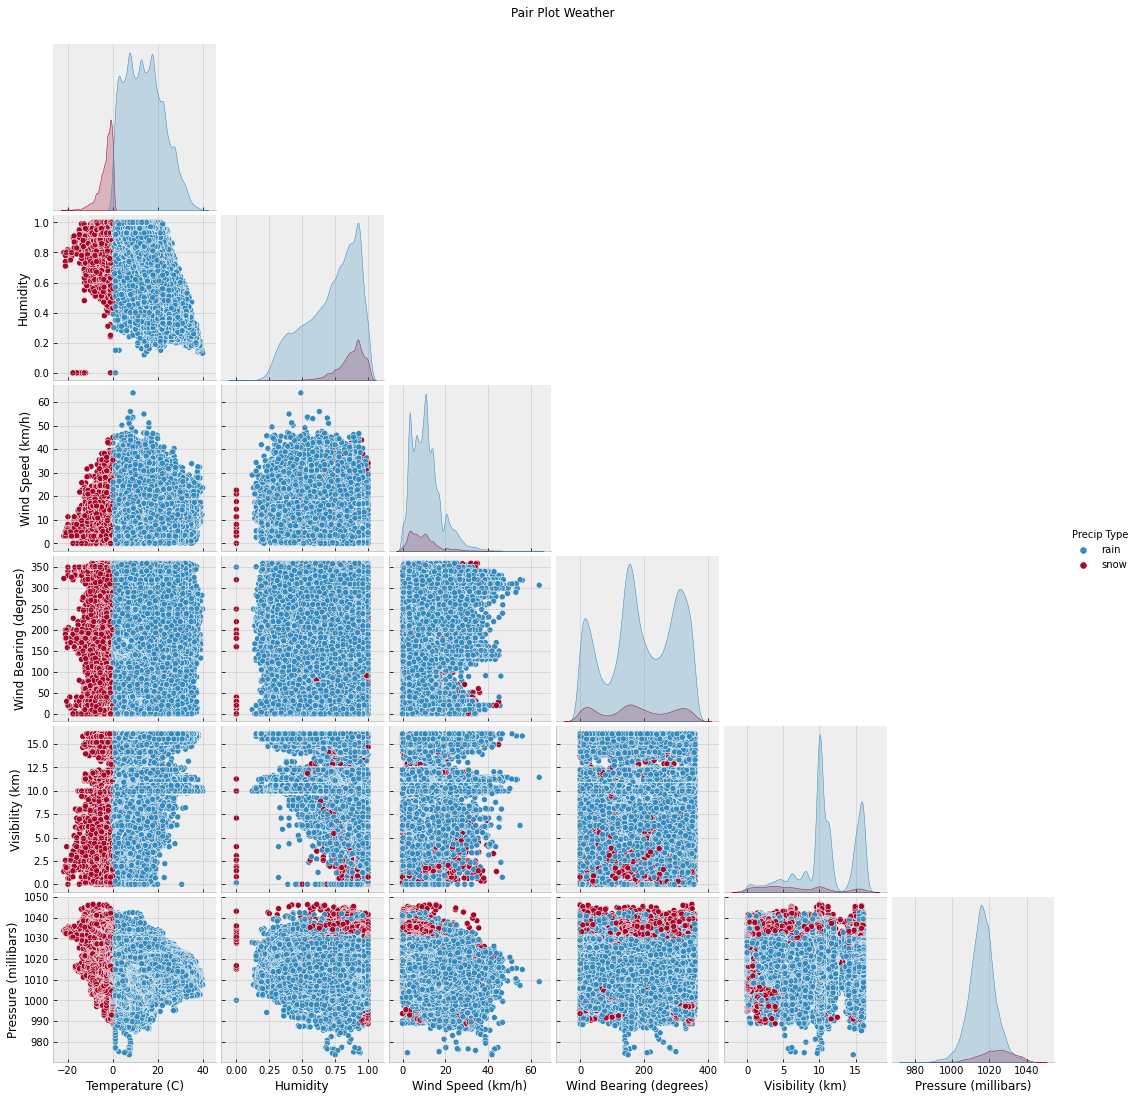

In [ ]:
weather_pair_plot = sns.pairplot(weather, hue = 'Precip Type' , corner=True)
weather_pair_plot.fig.suptitle('Pair Plot Weather', y=1.02);

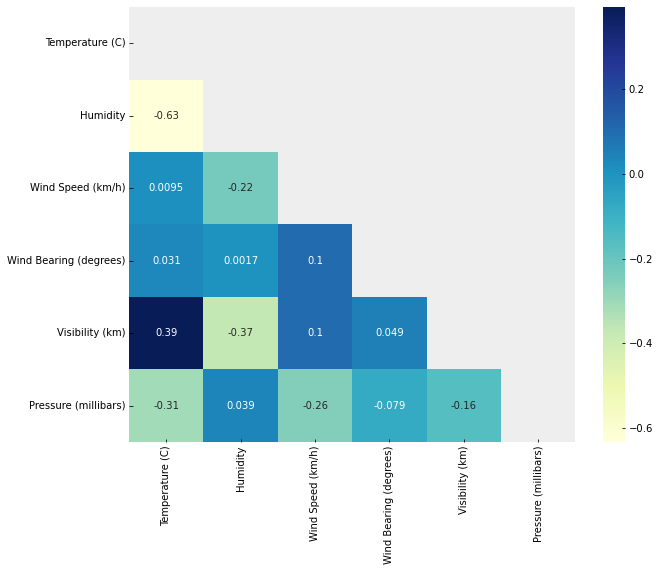

In [ ]:
fig, ax = plt.subplots(figsize=(10,8)) 

# creating mask
mask = np.triu(np.ones_like(weather.corr()), 0)

sns.heatmap(weather.corr(), annot=True, ax=ax, cmap="YlGnBu", mask=mask);

In [ ]:
print(weather['Summary'].value_counts(dropna=False).shape)
print()
weather['Summary'].value_counts(dropna=False)

(27,)



Partly Cloudy                          31513
Mostly Cloudy                          27780
Overcast                               16361
Clear                                  10035
Foggy                                   7019
Breezy and Overcast                      525
Breezy and Mostly Cloudy                 511
Breezy and Partly Cloudy                 379
Dry and Partly Cloudy                     86
Light Rain                                63
Windy and Partly Cloudy                   63
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   34
Dry                                       34
Breezy                                    30
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Humid and Overcast                         7
Windy and 

In [ ]:
# drop this categirical variable, too many values 

print(weather['Daily Summary'].value_counts(dropna=False).shape)
print()
weather['Daily Summary'].value_counts(dropna=False)

(214,)



Mostly cloudy throughout the day.                         19951
Partly cloudy throughout the day.                          9924
Partly cloudy until night.                                 6134
Partly cloudy starting in the morning.                     5156
Foggy in the morning.                                      4149
                                                          ...  
Mostly cloudy overnight.                                      9
Breezy starting in the morning continuing until night.        8
Windy in the afternoon.                                       8
Breezy starting overnight continuing until morning.           8
Light rain overnight.                                         3
Name: Daily Summary, Length: 214, dtype: int64

In [ ]:
# drop daily summary 

weather = weather.drop('Daily Summary', axis=1)

In [ ]:
weather.head()

,Date_time,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51


In [ ]:
weather.columns

Index(['Date_time', 'Summary', 'Precip Type', 'Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

In [ ]:
weather = weather.rename(columns={
    'Precip Type': 'Precip_Type',
    'Temperature (C)': 'Temperature',
    'Wind Speed (km/h)': 'Wind_Speed',
    'Wind Bearing (degrees)': 'Wind_Bearing',
    'Visibility (km)': 'Visibility',
    'Pressure (millibars)': 'Pressure'})

In [ ]:
weather

,Date_time,Summary,Precip_Type,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,2016-09-09 20:00:00,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,2016-09-09 21:00:00,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,2016-09-09 22:00:00,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [ ]:
org_values = list(weather['Summary'].unique())

dash_values = [x.replace(' ', '_') for x in org_values]

weather['Summary'] = weather['Summary'].replace(org_values, dash_values)

In [ ]:
# categorical variables to dummies variables  

weather = pd.get_dummies(weather, columns=['Summary', 'Precip_Type'], drop_first=True)

In [ ]:
weather.head()

,Date_time,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Summary_Breezy_and_Dry,Summary_Breezy_and_Foggy,Summary_Breezy_and_Mostly_Cloudy,...,Summary_Overcast,Summary_Partly_Cloudy,Summary_Rain,Summary_Windy,Summary_Windy_and_Dry,Summary_Windy_and_Foggy,Summary_Windy_and_Mostly_Cloudy,Summary_Windy_and_Overcast,Summary_Windy_and_Partly_Cloudy,Precip_Type_snow
0,2006-04-01 00:00:00,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2006-04-01 01:00:00,9.355556,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006-04-01 02:00:00,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2006-04-01 03:00:00,8.288889,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2006-04-01 04:00:00,8.755556,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
weather.columns

Index(['Date_time', 'Temperature', 'Humidity', 'Wind_Speed', 'Wind_Bearing',
       'Visibility', 'Pressure', 'Summary_Breezy_and_Dry',
       'Summary_Breezy_and_Foggy', 'Summary_Breezy_and_Mostly_Cloudy',
       'Summary_Breezy_and_Overcast', 'Summary_Breezy_and_Partly_Cloudy',
       'Summary_Clear', 'Summary_Dangerously_Windy_and_Partly_Cloudy',
       'Summary_Drizzle', 'Summary_Dry', 'Summary_Dry_and_Mostly_Cloudy',
       'Summary_Dry_and_Partly_Cloudy', 'Summary_Foggy',
       'Summary_Humid_and_Mostly_Cloudy', 'Summary_Humid_and_Overcast',
       'Summary_Humid_and_Partly_Cloudy', 'Summary_Light_Rain',
       'Summary_Mostly_Cloudy', 'Summary_Overcast', 'Summary_Partly_Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy_and_Dry',
       'Summary_Windy_and_Foggy', 'Summary_Windy_and_Mostly_Cloudy',
       'Summary_Windy_and_Overcast', 'Summary_Windy_and_Partly_Cloudy',
       'Precip_Type_snow'],
      dtype='object')

In [ ]:
for x in weather.columns:
    print(x, '+ \\')

Date_time + \
Temperature + \
Humidity + \
Wind_Speed + \
Wind_Bearing + \
Visibility + \
Pressure + \
Summary_Breezy_and_Dry + \
Summary_Breezy_and_Foggy + \
Summary_Breezy_and_Mostly_Cloudy + \
Summary_Breezy_and_Overcast + \
Summary_Breezy_and_Partly_Cloudy + \
Summary_Clear + \
Summary_Dangerously_Windy_and_Partly_Cloudy + \
Summary_Drizzle + \
Summary_Dry + \
Summary_Dry_and_Mostly_Cloudy + \
Summary_Dry_and_Partly_Cloudy + \
Summary_Foggy + \
Summary_Humid_and_Mostly_Cloudy + \
Summary_Humid_and_Overcast + \
Summary_Humid_and_Partly_Cloudy + \
Summary_Light_Rain + \
Summary_Mostly_Cloudy + \
Summary_Overcast + \
Summary_Partly_Cloudy + \
Summary_Rain + \
Summary_Windy + \
Summary_Windy_and_Dry + \
Summary_Windy_and_Foggy + \
Summary_Windy_and_Mostly_Cloudy + \
Summary_Windy_and_Overcast + \
Summary_Windy_and_Partly_Cloudy + \
Precip_Type_snow + \


In [ ]:
# OLS model - Original data

# Initialize the regression model
m = sm.ols('Temperature ~ \
    Humidity + \
    Wind_Speed + \
    Wind_Bearing + \
    Visibility + \
    Pressure + \
    Summary_Breezy_and_Dry + \
    Summary_Breezy_and_Foggy + \
    Summary_Breezy_and_Mostly_Cloudy + \
    Summary_Breezy_and_Overcast + \
    Summary_Breezy_and_Partly_Cloudy + \
    Summary_Clear + \
    Summary_Dangerously_Windy_and_Partly_Cloudy + \
    Summary_Drizzle + \
    Summary_Dry + \
    Summary_Dry_and_Mostly_Cloudy + \
    Summary_Dry_and_Partly_Cloudy + \
    Summary_Foggy + \
    Summary_Humid_and_Mostly_Cloudy + \
    Summary_Humid_and_Overcast + \
    Summary_Humid_and_Partly_Cloudy + \
    Summary_Light_Rain + \
    Summary_Mostly_Cloudy + \
    Summary_Overcast + \
    Summary_Partly_Cloudy + \
    Summary_Rain + \
    Summary_Windy + \
    Summary_Windy_and_Dry + \
    Summary_Windy_and_Foggy + \
    Summary_Windy_and_Mostly_Cloudy + \
    Summary_Windy_and_Overcast + \
    Summary_Windy_and_Partly_Cloudy + \
    Precip_Type_snow', \
    data = weather)

# Fit the regression model
m = m.fit()

In [ ]:
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     5640.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:08:38   Log-Likelihood:            -2.9752e+05
No. Observations:               94648   AIC:                         5.951e+05
Df Residuals:                   94615   BIC:                         5.954e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------